## Generating Ellipses of custom Shape

(97, 2)


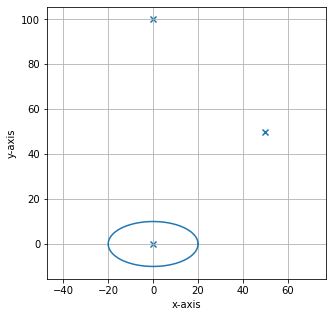

In [23]:
import numpy as np
from lmd.lib import Collection, Shape
from lmd import tools

calibration = np.array([[0, 0], [0, 100], [50, 50]])
my_first_collection = Collection(calibration_points = calibration)

my_ellipse = tools.ellipse(20, 10)
my_first_collection.add_shape(my_ellipse)
my_first_collection.plot(calibration = True)

# we can change the number of vertices along the perimeter of the ellipse
# This improves overall performance and loading and cutting time on the Leica LMD 

(48, 2)


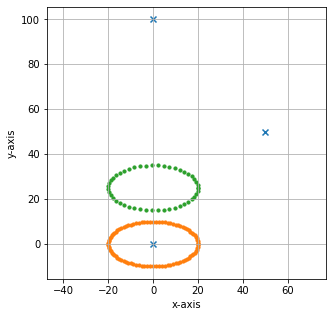

(19, 2)


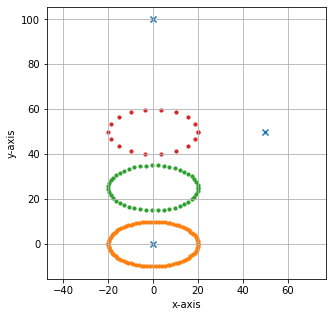

In [24]:
# we can change the number of vertices along the perimeter of the ellipse
# This improves overall performance and loading and cutting time on the Leica LMD my_ellipse = tools.ellipse(20, 10, offset=(20,10), polygon_resolution=5)

my_ellipse = tools.ellipse(20, 10, offset = (0, 25), polygon_resolution= 2)
my_first_collection.add_shape(my_ellipse)
my_first_collection.plot(calibration = True, mode='dots')

my_ellipse = tools.ellipse(20, 10, offset = (0, 50), polygon_resolution= 5)
my_first_collection.add_shape(my_ellipse)
my_first_collection.plot(calibration = True, mode='dots')

(19, 2)


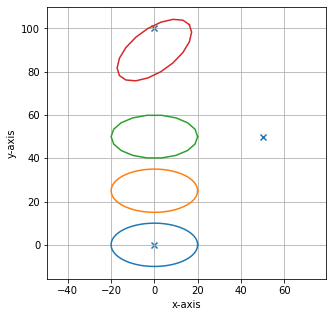

In [25]:
# we can also rotate the elipse counterclockwise

my_ellipse = tools.ellipse(20, 10, offset = (0, 90), polygon_resolution = 5, rotation = 1.8*np.pi)
my_first_collection.add_shape(my_ellipse)
my_first_collection.plot(calibration = True)

## Loading Cell Dimensions from a csv and Generate Shapes

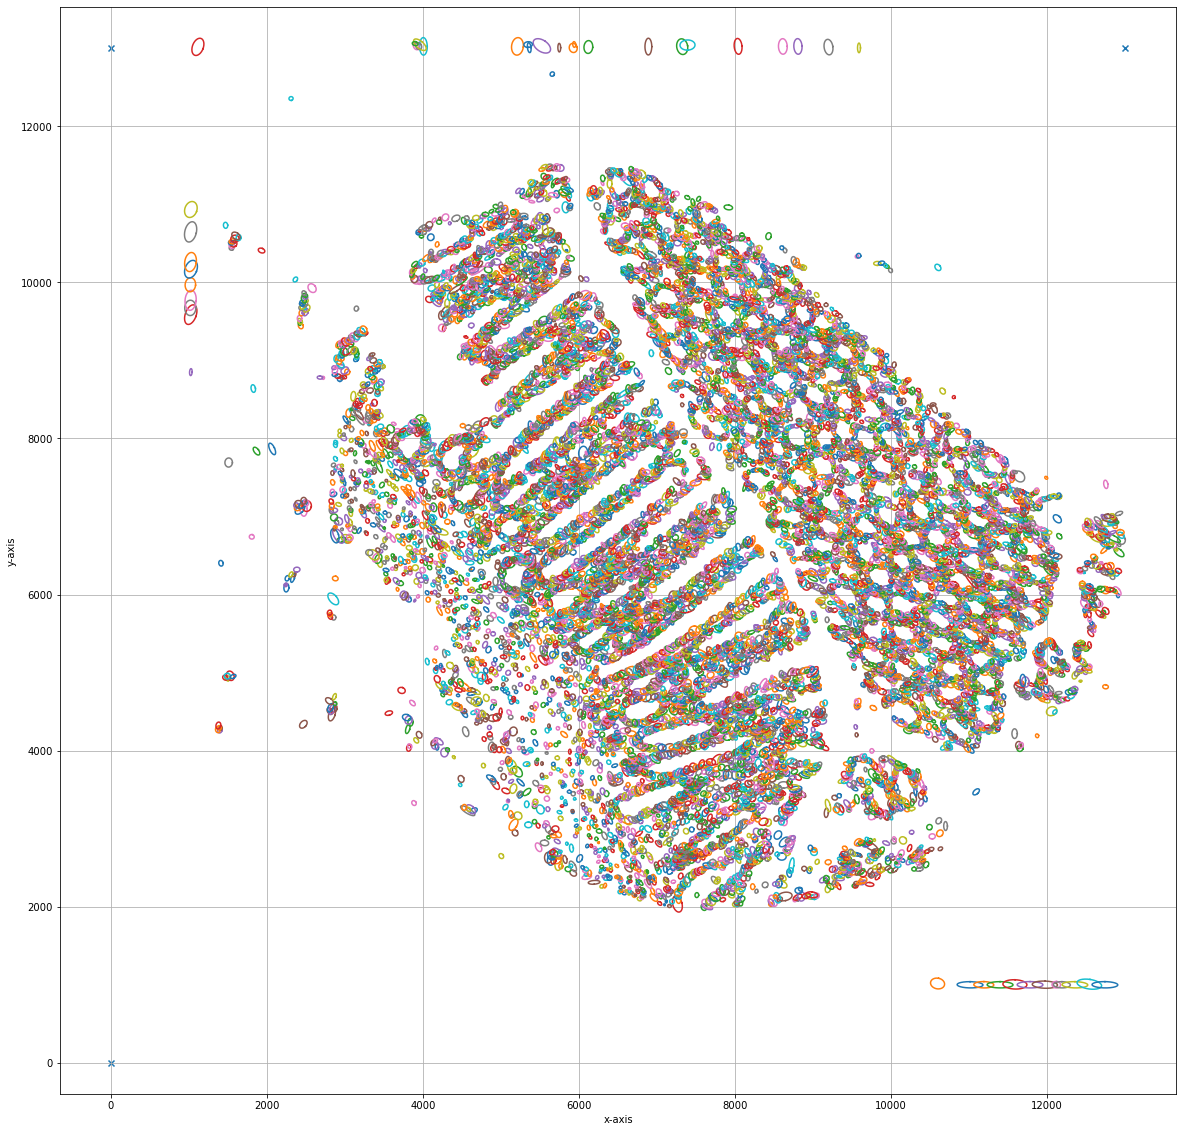

In [2]:
import pandas as pd
import numpy as np
from lmd.lib import Collection, Shape
from lmd import tools

calibration = np.array([[0, 0], [0, 13000], [13000, 13000]])
my_first_collection = Collection(calibration_points = calibration)

# load csv
df = pd.read_csv('sample_locations.csv')

# iterate all rows
for row_dict in df.to_dict(orient="records"):
    
    # generate a shape for each row
    cell_shape = tools.ellipse(row_dict['MinorAxisLength'],
                                row_dict['MajorAxisLength'],
                               offset = (row_dict['X_centroid'], row_dict['Y_centroid']),
                               rotation = row_dict['Orientation'])
    
    # add shape to collection
    my_first_collection.add_shape(cell_shape)
    
my_first_collection.plot(calibration = True, fig_size = (20, 20), save_name='fig.png')